In [1]:
import vaex
import pandas as pd
import numpy as np
from glob import glob
from time import time
from os.path import join, abspath
from os import pardir, mkdir

In [2]:
name = "Best-Pars"
root_data_dir = abspath(join(pardir, "Data"))
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")
data_dir

Creating Best-Pars dir in Data dir


'/home2/s20321005/Thesis-Project/Data/Best-Pars'

In [3]:
rv1_file = join(root_data_dir, "RV", "1rv.hdf5")
rv1_file

'/home2/s20321005/Thesis-Project/Data/RV/1rv.hdf5'

In [5]:
data = vaex.open(rv1_file)
data

#,source_id,ra,dec,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,Gmag,BPmag,RPmag,rv_gaia,e_rv_gaia,bp_rp,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,Jmag,Hmag,Kmag,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,teff_rave,logg_rave,mh_rave,alphafe_rave,rv_rave,e_rv_rave,rv_galah,e_rv_galah,feh_galah,alphafe_galah,teff_galah,e_teff_galah,logg_galah,e_logg_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,4617686126396602368,0.00032502334,-84.27291432237,3.621,-2.124,0.018,2.933,0.015576468,1.2414,0.014,14.117249,14.546528,13.524261,20.12,3.33,1.022267,304.44429715165,-32.70355447144,5658.6,5653.9,5668.2,4.2226,4.2043,4.2496,-0.0402,-0.0457,-0.0316,770.2898,746.2748,786.9589,0.2956,0.2926,0.2995,12.869,12.509,12.374,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4617598371624860928,0.00191968032,-84.8042926575,17.004,16.266,0.015,4.955,0.016042866,0.6862,0.0132,14.117252,14.645076,13.433549,-23.82,3.24,1.211527,304.29624940744,-32.18708166475,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.523,12.023,11.93,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,4617602769671367936,0.00280530163,-84.7189980137,5.981,5.928,0.015,-0.793,0.01440706,0.1782,0.0117,13.724135,14.456079,12.896074,131.92,1.27,1.560004,304.31980747322,-32.26998931505,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.746,11.026,10.877,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,4630074530064792448,0.00421630122,-82.75028818096,11.209,10.525,0.02,3.856,0.02012978,1.0276,0.0177,14.624002,15.035072,14.034426,-43.85,5.6,1.000647,304.87685643084,-34.18279113636,6107.5,6101.2,6117.2,4.2386,4.2239,4.2526,-0.8342,-0.8443,-0.8225,911.0151,895.5346,927.2803,0.619,0.6154,0.624,13.333,12.976,12.872,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4630918748836674432,0.00779935188,-82.03164864496,18.801,18.3,0.017,-4.31,0.018285993,1.1269,0.0139,13.798758,14.187072,13.238532,-27.09,4.73,0.94854,305.08589767451,-34.8804551969,5503.9,5470.2,5528.5,4.1392,4.1308,4.148,-0.7153,-0.7508,-0.6893,856.8555,845.9437,867.5156,0.1912,0.1723,0.2052,12.605,12.244,12.209,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",2304646710499313408,359.705195887,88.15598795517,24.278,24.276,0.017,-0.303,0.016044414,2.6359,0.014,14.10109,14.674556,13.384232,-8.93,2.75,1.290324,122.46781764928,25.3318385089,4983.4,4969.7,5000.9,4.5079,4.5034,4.5125,-0.1674,-0.179

In [6]:
# divide into multiple RAs for stability
ras = np.linspace(0,360, 361).astype(int)
ras

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
# function to select the BEST parameter, not optimized tho, but works

# TypeScript-like style type definitions
# Input
## pars: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } | number // upper and lower error OR just singgle number
##   cat: string // catalog name
## }[] // parameter values
## index: number // row index

# Output: Array
## par: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } // best upper and lower error
##   symmetric: boolean // if lower == upper
##   cat: string // best catalog name
## }

NaN = {'value': np.nan, 'error': {'lower': np.nan, 'upper': np.nan}, 'symmetric': np.nan , 'cat': np.nan}

def select_best(pars, index):
    pars = np.array(pars)
    if len(pars) == 0: return NaN
    elif len(pars) == 1:
        if ('lower' in pars[0]['error']) and ('upper' in pars[0]['error']):
            if np.isnan(pars[0]['error']['lower']):
                pars[0]['symmetric'] = np.nan
            else:
                pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
        elif np.isnan(pars[0]['error']):
            pars[0]['symmetric'] = np.nan
        elif (type(pars[0]['error']) == float) or (type(pars[0]['error']) == int):
            pars[0]['symmetric'] = True
        if np.isnan(pars[0]['value']):
            pars[0] = NaN
        return pars[0]
    else:
        mask = []
        for i, par in enumerate(pars):
            if(type(par['error']) == float) or (type(par['error']) == int):
                mask.append(par['error'] > 0)
                pars[i]['error'] = {'lower': par['error'], 'upper': par['error']}
            elif (type(par['error']) == dict):
                if('lower' not in par['error']) or ('upper' not in par['error']): 
                    raise TypeError('lower and/or upper keys dont exist')
                mask.append(par['error']['lower'] > 0 and par['error']['upper'] > 0)
        pars = pars[mask]
        errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, pars)))
        values = np.array(list(map(lambda x: x['value'], pars)))
        if len(pars) == 0: return NaN
        elif len(pars) == 1:
            pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
            return pars[0]
        elif len(rvs) == 2:
            i = np.argmin(errors)
            pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
            return pars[i]
        else:
            avg = np.average(values, weights=1/errors)
            selected_pars = []
            for par in pars:
                if (par['value'] + par['error']['upper'] > avg) and (par['value'] - par['error']['lower'] < avg):
                    selected_pars.append(par)
            if (len(selected_pars) == 0):
                i = np.argmin(errors)
                pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
                return pars[i]
            else:
                errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, selected_pars)))
                i = np.argmin(errors)
                selected_pars[i]['symmetric'] = selected_pars[i]['error']['lower'] == selected_pars[i]['error']['upper']
                return selected_pars[i]

In [8]:
# Extract which columns should be used

# par_cols: {
#   value: string
#   error?: {
#     upper: string
#     lower: string
#   } | string
#   cat: string
# }[]
# row: pandas.core.series.Series
def extract_pars(par_cols, row):
    pars = []
    for col in par_cols:
        par = {}
        par['value'] = row[col['value']]
        if type(col['error']) == dict:
            if ('lower' not in col['error']) or ('upper' not in col['error']):
                raise TypeError('lower and/or upper does not exist in error dict')
            par['error'] = {'lower': par['value'] - row[col['error']['lower']] , 'upper': row[col['error']['upper']] - par['value']}
        elif (type(col['error']) == str):
            par['error'] = row[col['error']]
        else:
            par['error'] = np.nan
        par['cat'] = col['cat']
        pars.append(par)
    return pars

In [9]:
removed_columns = [ 'rv_gaia', 'e_rv_gaia', 'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper',
                     'logg_gspphot', 'logg_gspphot_lower', 'logg_gspphot_upper', 'mh_gspphot', 'mh_gspphot_lower',
                     'mh_gspphot_upper', 'mh_gspspec', 'mh_gspspec_lower', 'mh_gspspec_upper', 'alphafe_gspspec',
                     'alphafe_gspspec_lower', 'alphafe_gspspec_upper', 'fem_gspspec', 'fem_gspspec_lower',
                     'fem_gspspec_upper','rv_rave', 'e_rv_rave', 'teff_rave', 'logg_rave', 'mh_rave',
                     'alphafe_rave', 'rv_galah', 'e_rv_galah', 'feh_galah', 'alphafe_galah', 'teff_galah',
                     'e_teff_galah', 'logg_galah', 'e_logg_galah', 'teff_lamost', 'e_teff_lamost',
                     'logg_lamost', 'e_logg_lamost', 'feh_lamost', 'e_feh_lamost', 'rv_lamost',
                     'e_rv_lamost', 'alpham_lamost', 'e_alpham_lamost', 'rv_apogee', 'e_rv_apogee',
                     'teff_apogee', 'e_teff_apogee', 'logg_apogee', 'e_logg_apogee', 'mh_apogee',
                     'e_mh_apogee', 'feh_apogee', 'e_feh_apogee', 'alpham_apogee', 'e_alpham_apogee']

In [10]:
# cols initiation
rv_cols = [
    {
        'value': 'rv_gaia', 
        'error': 'e_rv_gaia', 
        'cat': 'gaia'
    }, 
    {
        'value': 'rv_rave', 
        'error': 'e_rv_rave', 
        'cat': 'rave'
    },
    {
        'value': 'rv_apogee', 
        'error': 'e_rv_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'rv_lamost', 
        'error': 'e_rv_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'rv_galah', 
        'error': 'e_rv_galah', 
        'cat': 'galah'
    }
]

teff_cols = [
    {
        'value': 'teff_gspphot', 
        'error': {
            'upper': 'teff_gspphot_upper',
            'lower': 'teff_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'teff_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'teff_apogee', 
        'error': 'e_teff_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'teff_lamost', 
        'error': 'e_teff_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'teff_galah', 
        'error': 'e_teff_galah', 
        'cat': 'galah'
    }
]

logg_cols = [
    {
        'value': 'logg_gspphot', 
        'error': {
            'upper': 'logg_gspphot_upper',
            'lower': 'logg_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'logg_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'logg_apogee', 
        'error': 'e_logg_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'logg_lamost', 
        'error': 'e_logg_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'logg_galah', 
        'error': 'e_logg_galah', 
        'cat': 'galah'
    }
]

mh_cols = [
    {
        'value': 'mh_gspphot', 
        'error': {
            'upper': 'mh_gspphot_upper',
            'lower': 'mh_gspphot_lower'
        }, 
        'cat': 'gspphot'
    },
    {
        'value': 'mh_gspspec', 
        'error': {
            'upper': 'mh_gspspec_upper',
            'lower': 'mh_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'mh_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'mh_apogee', 
        'error': 'e_mh_apogee', 
        'cat': 'apogee'
    }
]

alphafe_cols = [
    {
        'value': 'alphafe_gspspec', 
        'error': {
            'upper': 'alphafe_gspspec_upper',
            'lower': 'alphafe_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'alphafe_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'alphafe_galah', 
        'error': np.nan, 
        'cat': 'galah'
    }
]

fem_cols = [
    {
        'value': 'fem_gspspec', 
        'error': {
            'upper': 'fem_gspspec_upper',
            'lower': 'fem_gspspec_lower'
        }, 
        'cat': 'gspspec'
    }
]

feh_cols = [
    {
        'value': 'feh_galah', 
        'error': np.nan, 
        'cat': 'galah'
    },
    {
        'value': 'feh_lamost', 
        'error': 'e_feh_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'feh_apogee', 
        'error': 'e_feh_apogee', 
        'cat': 'apogee'
    }
]

In [11]:
# run the operation!
df_com = []
for i, (ra0, ra1) in enumerate(zip(ras[:-1], ras[1:])):
    # if ra0 <= 69: continue
    rvs = []
    teffs = []
    loggs = []
    mhs = []
    alphafes = []
    fems = []
    fehs = []

    data_filtered = data.filter(data.ra > ra0).filter(data.ra <= ra1)
    df = data_filtered.to_pandas_df()
    t0 = time()
    for index, row in df.iterrows():
        # rv
        rv = extract_pars(rv_cols, row)
        rv_best = select_best(rv, index)
        rvs.append(rv_best)
        # teff
        teff = extract_pars(teff_cols, row)
        teff_best = select_best(teff, index)
        teffs.append(teff_best)
        # logg
        logg = extract_pars(logg_cols, row)
        logg_best = select_best(logg, index)
        loggs.append(logg_best)
        # mh
        mh = extract_pars(mh_cols, row)
        mh_best = select_best(mh, index)
        mhs.append(mh_best)
        # alphafe
        alphafe = extract_pars(alphafe_cols, row)
        alphafe_best = select_best(alphafe, index)
        alphafes.append(alphafe_best)
        # fem
        fem = extract_pars(fem_cols, row)
        fem_best = select_best(fem, index)
        fems.append(fem_best)
        # feh
        feh = extract_pars(feh_cols, row)
        feh_best = select_best(feh, index)
        fehs.append(feh_best)
        
    # rv    
    df['rv'] = list(map(lambda x: x['value'], rvs))
    df['e_rv'] = list(map(lambda x: x['error']['lower'], rvs))
    df['rv_cat'] = list(map(lambda x: x['cat'], rvs))
    # teff   
    df['teff'] = list(map(lambda x: x['value'], teffs))
    df['e_teff_lower'] = list(map(lambda x: x['error']['lower'], teffs))
    df['e_teff_upper'] = list(map(lambda x: x['error']['upper'], teffs))
    df['teff_symmetric'] = np.array(list(map(lambda x: x['symmetric'], teffs)))
    df['teff_cat'] = list(map(lambda x: x['cat'], teffs))
    # logg
    df['logg'] = list(map(lambda x: x['value'], loggs))
    df['e_logg_lower'] = list(map(lambda x: x['error']['lower'], loggs))
    df['e_logg_upper'] = list(map(lambda x: x['error']['upper'], loggs))
    df['logg_symmetric'] = np.array(list(map(lambda x: x['symmetric'], loggs)))
    df['logg_cat'] = list(map(lambda x: x['cat'], loggs))
    # mh
    df['mh'] = list(map(lambda x: x['value'], mhs))
    df['e_mh_lower'] = list(map(lambda x: x['error']['lower'], mhs))
    df['e_mh_upper'] = list(map(lambda x: x['error']['upper'], mhs))
    df['mh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], mhs)))
    df['mh_cat'] = list(map(lambda x: x['cat'], mhs))
    # alphafe
    df['alphafe'] = list(map(lambda x: x['value'], alphafes))
    df['e_alphafe_lower'] = list(map(lambda x: x['error']['lower'], alphafes))
    df['e_alphafe_upper'] = list(map(lambda x: x['error']['upper'], alphafes))
    df['alphafe_symmetric'] = np.array(list(map(lambda x: x['symmetric'], alphafes)))
    df['alphafe_cat'] = list(map(lambda x: x['cat'], alphafes))
    # fem
    df['fem'] = list(map(lambda x: x['value'], fems))
    df['e_fem_lower'] = list(map(lambda x: x['error']['lower'], fems))
    df['e_fem_upper'] = list(map(lambda x: x['error']['upper'], fems))
    df['fem_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fems)))
    df['fem_cat'] = list(map(lambda x: x['cat'], fems))
    # feh
    df['feh'] = list(map(lambda x: x['value'], fems))
    df['e_feh_lower'] = list(map(lambda x: x['error']['lower'], fehs))
    df['e_feh_upper'] = list(map(lambda x: x['error']['upper'], fehs))
    df['feh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fehs)))
    df['feh_cat'] = list(map(lambda x: x['cat'], fehs))
    df.drop(labels=removed_columns,axis=1, inplace=True)
    if len(df_com) == 0:
        df_com = vaex.from_pandas(df)
    else:
        df_com = df_com.concat(vaex.from_pandas(df))
    t1 = time()
    print(f"saved {ra0:03d}-{ra1:03d} | {round(t1-t0, 2)}s", end=" | ")
    if ra1 % 60 == 0:
        # export every 60deg interval
        df_com.export(join(data_dir, f"clean-{(ra1-60):03d}-{ra1:03d}.hdf5"), progress=True)
        df_com = []

export(hdf5) [########################################] 100.00% elapsed time  :     4.76s =  0.1m =  0.0h 004-005 | 18.28s | saved 005-006 | 18.24s | saved 006-007 | 18.3s | saved 007-008 | 17.74s | saved 008-009 | 17.2s | saved 009-010 | 17.3s | saved 010-011 | 17.14s | saved 011-012 | 17.01s | saved 012-013 | 17.22s | saved 013-014 | 17.82s | saved 014-015 | 17.51s | saved 015-016 | 17.6s | saved 016-017 | 18.39s | saved 017-018 | 17.36s | saved 018-019 | 17.59s | saved 019-020 | 17.84s | saved 020-021 | 18.26s | saved 021-022 | 17.37s | saved 022-023 | 17.31s | saved 023-024 | 17.42s | saved 024-025 | 17.0s | saved 025-026 | 17.26s | saved 026-027 | 17.59s | saved 027-028 | 17.85s | saved 028-029 | 17.55s | saved 029-030 | 17.46s | saved 030-031 | 17.22s | saved 031-032 | 17.11s | saved 032-033 | 17.01s | saved 033-034 | 18.34s | saved 034-035 | 17.14s | saved 035-036 | 17.51s | saved 036-037 | 17.13s | saved 037-038 | 17.66s | saved 038-039 | 17.56s | saved 039-040 | 17.34s | saved

In [14]:
# check result
df = vaex.open(glob(join(data_dir,"*.hdf5")))
df


#,source_id,ra,dec,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,Gmag,BPmag,RPmag,bp_rp,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,Jmag,Hmag,Kmag,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,5764626493907404928,180.77497120163,-89.74483590708,9.478,-4.958,0.022,-8.078,0.02261984,1.9652,0.0171,14.470432,14.99604,13.798712,1.197329,302.87201459389,-26.87876739519,512.7744,508.4371,516.0735,0.2214,0.213,0.2286,13.002,12.516,12.48,K,--,-12.640000343322754,3.2799999713897705,gaia,4996.2001953125,11.7001953125,10.7998046875,0.0,gspphot,4.5192999839782715,0.0036001205444335938,0.006000041961669922,0.0,gspphot,0.3508000075817108,0.014500021934509277,0.014999985694885254,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,5764677964795486848,180.78708661226,-89.61452359012,7.155,4.592,0.021,-5.488,0.02276008,1.3628,0.0171,14.755868,15.207962,14.138418,1.069544,302.84166403238,-26.75128949992,742.406,723.0515,816.3685,0.1714,0.1463,0.2038,13.413,12.979,12.931,K,--,37.029998779296875,5.820000171661377,gaia,5147.0,42.2998046875,50.89990234375,0.0,gspphot,4.396299839019775,0.06009960174560547,0.02310037612915039,0.0,gspphot,-0.4068000018596649,0.04519999027252197,0.04980000853538513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
2,5764679064307089664,180.74408997732,-89.56268605133,14.677,-14.494,0.015,-2.309,0.0170029,1.9766,0.0133,12.098805,12.409622,11.614234,0.795388,302.8291133821,-26.70066256375,530.2942,517.3372,592.6332,0.2248,0.2126,0.2346,11.049,10.746,10.687,G,--,5.28000020980835,0.9300000071525574,gaia,6070.2001953125,28.7001953125,23.0,0.0,gspphot,3.916300058364868,0.08249998092651367,0.02110004425048828,0.0,gspphot,-0.7197999954223633,0.032199978828430176,0.021399974822998047,0.0,gspphot,0.1899999976158142,0.16999999806284904,0.22999998927116394,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,5764893743952200704,180.24920602574,-89.1365313556,2.946,0.664,0.013,-2.87,0.013664279,0.9392,0.0111,13.1322,13.70861,12.413128,1.295482,302.72168263083,-26.28546588038,982.1395,953.8985,1017.3578,0.2816,0.2725,0.2905,11.496,10.948,10.79,K,--,7.210000038146973,1.0099999904632568,gaia,4870.7998046875,12.599609375,12.60009765625,0.0,gspphot,3.3268001079559326,0.03150010108947754,0.025999784469604492,0.0,gspphot,-0.09210000187158585,0.013799995183944702,0.010899998247623444,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,5764911336138262144,180.59525347256,-88.94737618364,30.534,-30.523,0.012,-0.798,0.012975621,4.4739,0.0106,12.397581,12.86211,11.776171,1.085939,302.68279893935,-26.09946185637,225.234,223.3351,239.6481,0.0639,0.051,0.0725,11.048,10.66,10.548,K,--,2.369999885559082,0.8999999761581421,gaia,5067.0,20.89990234375,12.5,0.0,gspphot,4.503699779510498,0.03569984436035156,0.006600379943847656,0.0,gspphot,0.289900004863739,0.02529999613761902,0.013799995183944702,0.0,gspphot,-0.03999999910593033,0.07999999821186066,0.03999999910593033,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",576356749673201024,59.91438488185,89.01374662224,1.44,1.4,0.018,0.337,0.017144516,0.468,0.0152,10.26004,11.268821,9.281935,1.986886,123.73828878126,26.45402507839,1822.0059,1675.5856,1966.8372,1.3357,1.2045,1.4897,7.83,7.033,6.758,K,--,21.56999969482422,0.17000000178813934,gaia,4538.10009765625,132.7001953125,187.89990234375,0.0,gspp

<AxesSubplot:>

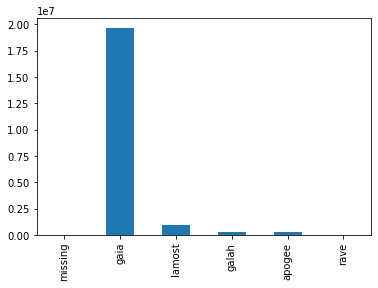

In [17]:
# if you want tp see rv distribution by which catalog it was choosen, run this
df['rv_cat'].value_counts().plot(kind='bar')